In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import pandas as pd


file = open('timeseries_aal.csv', 'rb')
data = np.loadtxt(file, delimiter = ",")
rows, cols = np.shape(data)
x = np.arange(0, cols)
brain_region = np.arange(0,rows)


Text(0, 0.5, 'MRI signal')

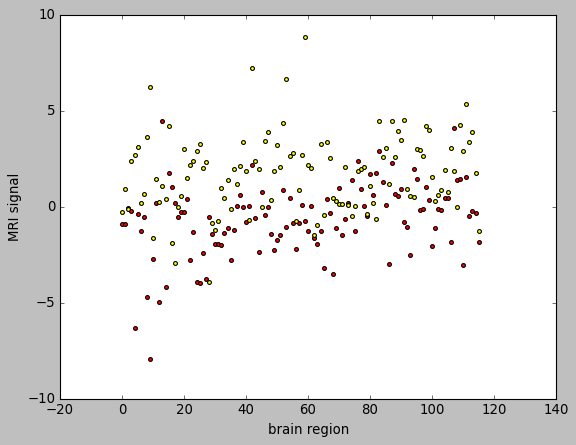

In [6]:
fig, ax = plt.subplots()
colors = np.random.randn(rows)
#for i in range(cols):     
plt.scatter(brain_region, data[: ,0], c='red', s = 12)
plt.scatter(brain_region, data[: ,50], c='yellow', s = 12)
plt.xlabel('brain region')
plt.ylabel('MRI signal')

array([1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

C:\Users\sabal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Squared-Error')

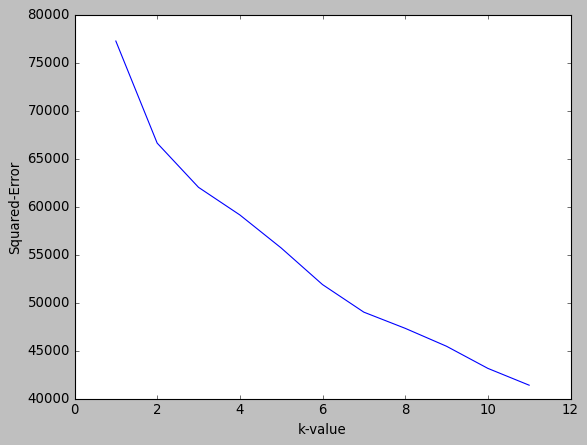

In [63]:
check_error= []
k_range = range(1,12)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(data)
    check_error.append(km.inertia_)

plt.plot(k_range, check_error)
plt.xlabel('k-value')
plt.ylabel('Squared-Error')

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

kmeans = KMeans(n_clusters = 7)
y_predicted = kmeans.fit_predict(data)
y_predicted

array([2, 2, 2, 0, 6, 6, 0, 0, 6, 6, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 3, 2,
       4, 4, 5, 4, 2, 2, 2, 2, 4, 4, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3,
       5, 5, 3, 3, 5, 5, 3, 5, 3, 4, 3, 3, 2, 2, 5, 5, 0, 0, 0, 2, 0, 4,
       5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 5, 2, 0, 2, 4,
       2, 2, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 2, 1])

Text(0, 0.5, 'MRI signal')

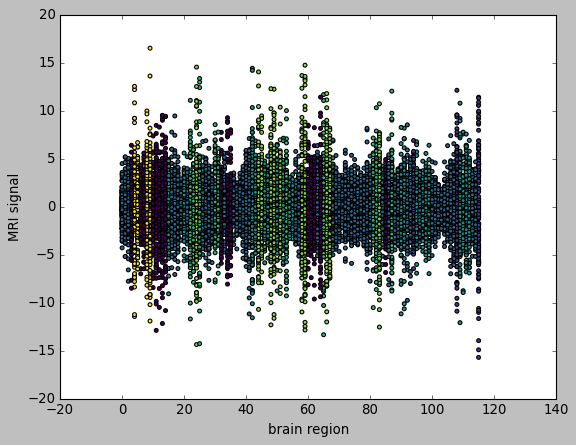

In [66]:
for i in range(cols):      
    plt.scatter(brain_region, data[: ,i], c=y_predicted, s = 12, cmap = 'viridis')
    
plt.xlabel('brain region')
plt.ylabel('MRI signal')

Text(0, 0.5, 'MRI signal')

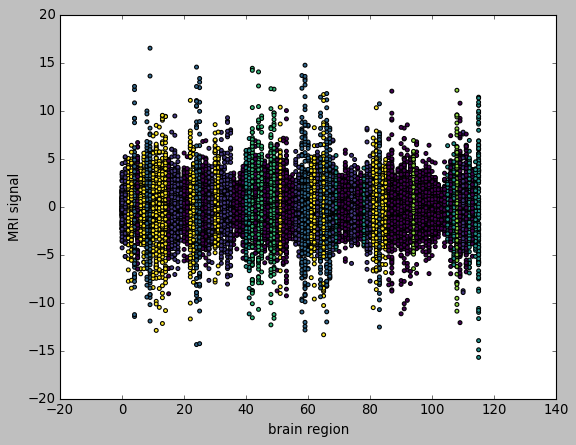

In [67]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 7).fit(data)
all_labels = gmm.predict(data)
probs = gmm.predict_proba(data)
size = 12 * probs.max(1) ** 2
for i in range(cols):
    plt.scatter(brain_region, data[:, i], c = all_labels, cmap='viridis', s = size)
plt.xlabel('brain region')
plt.ylabel('MRI signal')


In [68]:
brain_region

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115])